In [2]:
from qiskit import QuantumCircuit, transpile, quantum_info
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
import numpy as np

In [65]:
# A compact function that takes no. of bits input and outputs a random number between 0 and 2^n-1 using Aer simulator
def f(n):
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.measure_all()

    backend = AerSimulator()
    transpile_qc = transpile(qc, backend=backend, optimization_level=2)

    bits = []
    sampler = Sampler(backend)
    for _ in range(n):
        bits.append(list(sampler.run([(transpile_qc,None)]).result()[0].data.meas.get_counts().keys())[0] )

    bits = int("".join(bits),2)
    return bits



In [28]:
#Uncomment and put your QXToken below in IBM QPU to run the function
#-------------------------------------------------------------------------------------
service = QiskitRuntimeService(channel = "ibm_quantum", # ibm_cloud
                               token = "9781d2bc283fc5b36aa3d7d3210063bc62f31d57772106fa686b49469564499762dd9118eda929b4e368dd7816d81f201651428dd0e0780d5d93207263e914ce")
backend = service.least_busy(simulator=False, operational=True)
#-------------------------------------------------------------------------------------

# backend = AerSimulator()

In [6]:
def g(n,backend):
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
    qc.measure_all()
    transpile_qc = transpile(qc, backend=backend, optimization_level=2)

    sampler = Sampler(backend)

    job = sampler.run([(transpile_qc,None,1)])
    result_qc = job.result()
    I = result_qc[0].data.meas.get_counts().keys()
    print(I)
    return int(list(I)[0],2)


In [29]:
# Error mitigation through Pauli Twirling

n = 2
qc = QuantumCircuit(n)
for i in range(n):
    qc.h(i)
qc.measure_all()
transpile_qc = transpile(qc, backend=backend, optimization_level=2)

sampler = Sampler(backend)

job = sampler.run([(transpile_qc,None,400)])
print(job.job_id())
# result_qc = job.result()
# I = result_qc[0].data.meas.get_counts().keys()
# int(list(I)[0],2)

cw9qv54ggr6g0087tftg


In [30]:
options = {
    "twirling": {
        "enable_gates": True,
        "enable_measure": True,
        "strategy": "active-circuit"
    }
}

sampler_twirl = Sampler(backend, options=options)
job_twirl = sampler_twirl.run([(transpile_qc,None,400)])
print(job_twirl.job_id())
# result_qc_twirl = job_twirl.result()
# counts_qc_twirl = job_twirl.result()[0].data.meas.get_counts()

# plot_histogram([result_qc[0].data.meas.get_counts(), counts_qc_twirl], legend=['Raw', 'Pauli Twirled'])

cw9qv9x9ezk000815td0


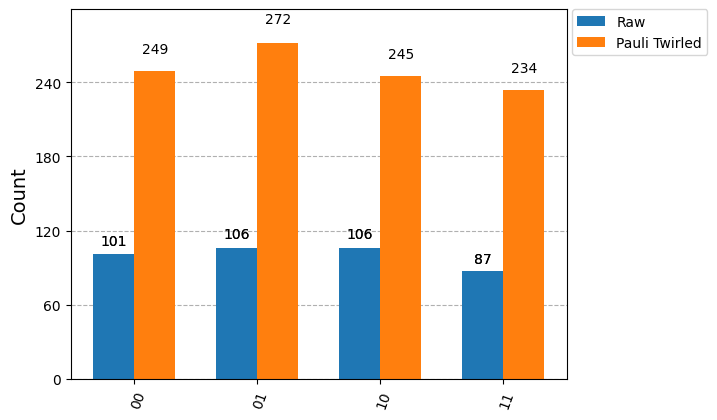

In [25]:
job_id = 'cw9qv54ggr6g0087tftg'
job_twirl_id = 'cw9qv9x9ezk000815td0'

job = service.job(job_id)
job_twirl = service.job(job_twirl_id)

job_result = job.result()
job_twirl_result = job_twirl.result()

counts = job_result[0].data.meas.get_counts()
counts_twirl = job_twirl_result[0].data.meas.get_counts()

plot_histogram([counts, counts_twirl], legend=['Raw', 'Pauli Twirled'])